In [151]:
%load_ext autoreload
%autoreload 2

from sklearn.model_selection import train_test_split
import data_generation as dg
from metrics import true_ece
import scipy.stats as st
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [152]:
dist1_1 = st.multivariate_normal(mean=[10, 10], cov=1, allow_singular=True)
dist1_2 = st.multivariate_normal(mean=[6, 6], cov=1.7, allow_singular=True)

In [153]:
dist2_1 = st.multivariate_normal(mean=[10, 10], cov=1, allow_singular=True)
dist2_2 = st.multivariate_normal(mean=[6, 6], cov=1.7, allow_singular=True)

In [154]:
class_object1 = dg.ClassObject([dist1_1, dist1_2], None)
class_object2 = dg.ClassObject([dist2_1, dist2_2], None)

In [155]:
test = dg.DataGeneration([class_object1, class_object2], n_uninformative_features=0, title="dg-test")

In [156]:
n_samples_per_class_and_dist = 1000

samples, labels = test.generate_data(n_samples_per_class_and_dist)

<module 'matplotlib.pyplot' from 'D:\\ProgrammingProjects\\PyCharm\\venv\\lib\\site-packages\\matplotlib\\pyplot.py'>

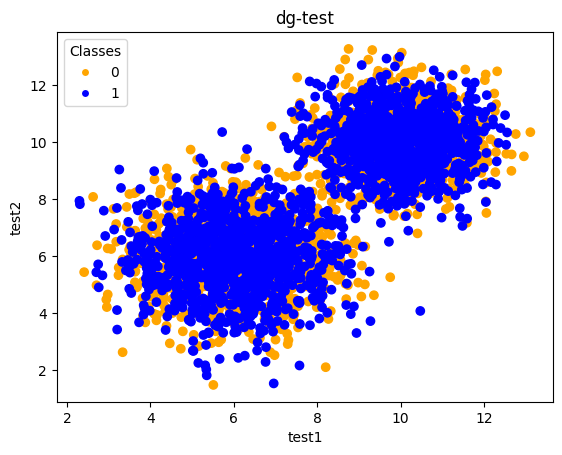

In [157]:
colormap = np.array(['orange', 'blue', 'red'])

test.scatter2d(0, 1, colormap=colormap, savePath="./plots/balanced_hard_dichotomy_few_features", axis1_label="test1", axis2_label="test2")

In [158]:
X_train, X_test, y_train, y_test = train_test_split(samples, labels, test_size=.3)

In [159]:
y_train = tf.keras.utils.to_categorical(y_train)
y_test = tf.keras.utils.to_categorical(y_test)

In [160]:
model = tf.keras.Sequential()

In [161]:
model.add(tf.keras.layers.Dense(50, activation="tanh"))

In [162]:
model.add(tf.keras.layers.Dense(2,activation="softmax"))

In [163]:
model.compile(optimizer="rmsprop", loss="categorical_crossentropy", metrics=["accuracy"])

In [164]:
model.fit(X_train.reshape(-1, 2), y_train, epochs=15, batch_size=1000)

Epoch 1/15
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4954 - loss: 0.8119  
Epoch 2/15
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5086 - loss: 0.7035 
Epoch 3/15
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5049 - loss: 0.6973 
Epoch 4/15
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4951 - loss: 0.6975 
Epoch 5/15
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4954 - loss: 0.6971 
Epoch 6/15
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5042 - loss: 0.6957 
Epoch 7/15
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4968 - loss: 0.6955 
Epoch 8/15
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4924 - loss: 0.6971 
Epoch 9/15
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5015 - loss: 0.6949 
Epoch 10/15
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4939 - loss: 0.6950 
Epoch 11/15
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4907 - loss: 0.6949 
Epoch 12/15
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4908 - loss: 0.6948 


In [165]:
model.evaluate(X_test.reshape(-1, 2), y_test)

38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 703us/step - accuracy: 0.4852 - loss: 0.6945


[0.6935321688652039, 0.4950000047683716]

In [166]:
predictions = model.predict(X_test.reshape(-1,2))

38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


In [167]:
y_test = np.argmax(y_test, axis=1)

In [168]:
p_test_true = np.array([[test.cond_prob(x, k=0), test.cond_prob(x, k=1)] for x in X_test])

In [169]:
true_ece.true_ece(predictions, p_test_true)

array([0.01138867, 0.01138866])

In [172]:
binned_metrics, balance_score_val, ksce_val = true_ece.calibration_error_summary(predictions, y_test, n_bins=np.array([10, 20, 50, 100, 200]))

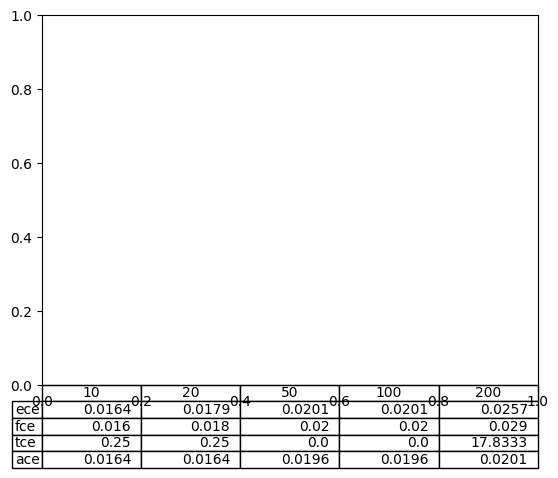

In [176]:
plt.table(cellText=binned_metrics, rowLabels=["ece", "fce", "tce", "ace"], colLabels=[10, 20, 50, 100, 200])